In [2]:
from __future__ import print_function

import matplotlib.image as mpimg 
import matplotlib.pyplot as plt
import struct
import numpy as np
%matplotlib inline

def calcPSNR(ref, img):
    shape = img.shape
    imgVec = img.reshape((shape[0] * shape[1] * shape[2]))
    refVec = ref.reshape((shape[0] * shape[1] * shape[2]))
    mse = np.mean(np.square(np.subtract(refVec, imgVec)))
    return (20 * np.log10(np.max(refVec)) - 10 * np.log10(mse), mse)

import os
# os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

import sys
from keras.preprocessing.image import ImageDataGenerator

from model import seg,unet,DMCNN,HDRDMCNN
import numpy as np
from keras.utils import np_utils
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping,TerminateOnNaN
from scipy import misc
from keras.callbacks import TensorBoard
import math
import cv2 as cv
import tools.img2raw as im

import tensorflow as tf

Using TensorFlow backend.


In [3]:
model = DMCNN.dmcnn(128,128,3)
model.load_weights("weight/dmcnn.h5")

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 128)     31232     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 64)      8256      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 3)       4803      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 128, 128, 3)       12        
Total params: 44,303
Trainable params: 44,303
Non-trainable params: 0
_________________________________________________________________


In [15]:
image = im.readImg("kodim06.png")
output = np.zeros(shape=(image.shape))

for i in range(0, int(image.shape[0] / 64)):
    for j in range(0, int(image.shape[1] / 64)):
        patch = image[i * 128 : (i + 1) * 128, j * 128 : (j + 1) * 128, :]
        cfa = im.cfa2rgb(im.bayer_cfa0, "SONY NEX-5N")
        raw = im.im2cfa(patch, cfa)
        result = model.predict(np.array([raw]))[0]
        output[i * 128 : (i + 1) * 128, j * 128 : (j + 1) * 128, :] = result

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


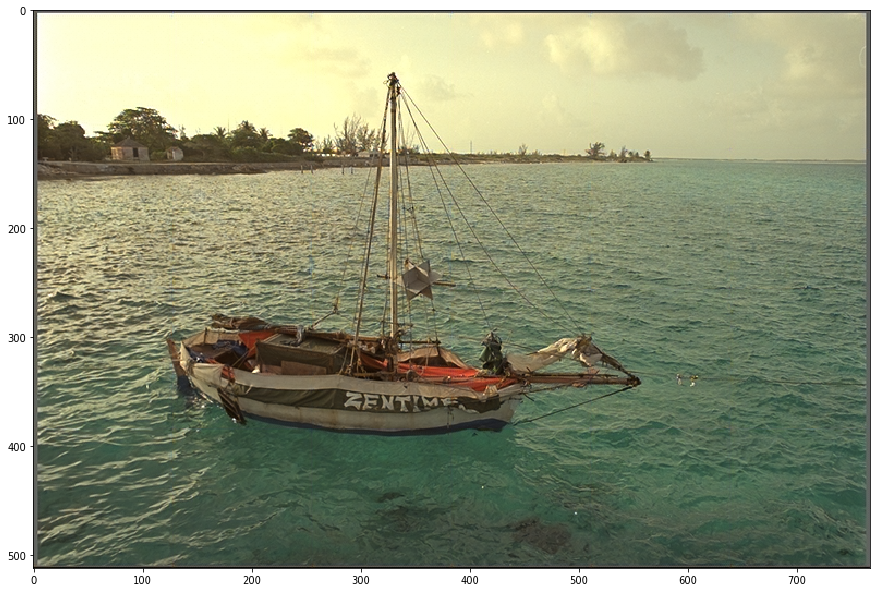

In [16]:
plt.figure(figsize=(15,15))
plt.imshow(output)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


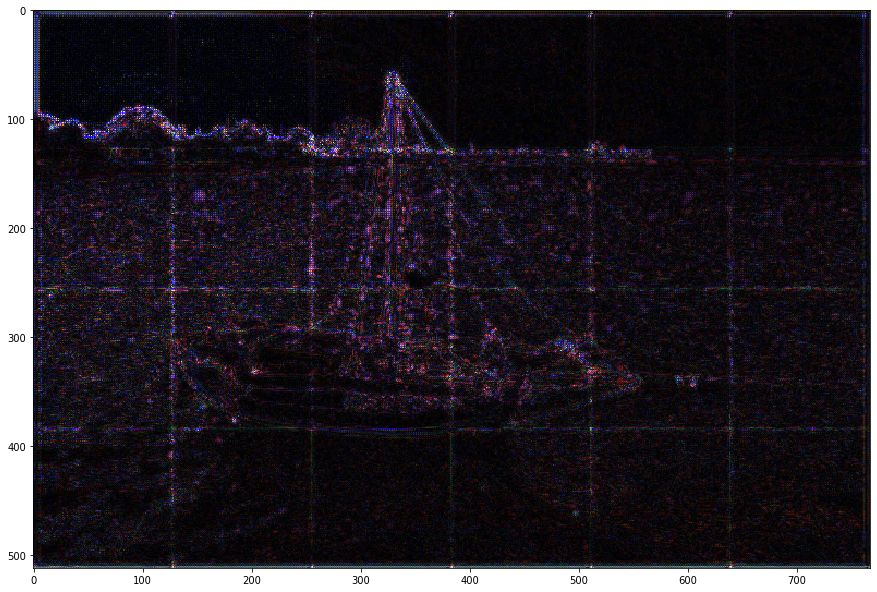

In [20]:
plt.figure(figsize=(15,15))
plt.imshow(np.fabs(image - output) * 10)